In [35]:
library(lme4)
library(lmerTest)

In [36]:
DATA <- read.csv("All.csv")

In [37]:
#零模型
model1 <- lmer(HW ~ 1 + (1 | edu), data=DATA) 
summary(model1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: HW ~ 1 + (1 | edu)
   Data: DATA

REML criterion at convergence: 1681.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3371 -0.4050  0.2527  0.7600  1.7087 

Random effects:
 Groups   Name        Variance Std.Dev.
 edu      (Intercept) 0.01159  0.1077  
 Residual             1.02751  1.0137  
Number of obs: 585, groups:  edu, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)
(Intercept) -0.04820    0.07922  0.67531  -0.609    0.687

In [38]:
#随机截距模型
model2<- lmer(HW ~ RL + (1 | edu), data=DATA) 
summary(model2)

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: HW ~ RL + (1 | edu)
   Data: DATA

REML criterion at convergence: 1212.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5029 -0.3957  0.1694  0.5183  2.9637 

Random effects:
 Groups   Name        Variance Std.Dev.
 edu      (Intercept) 0.0000   0.0000  
 Residual             0.4584   0.6771  
Number of obs: 585, groups:  edu, 5

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept) -5.857e-11  2.799e-02  5.830e+02    0.00        1    
RL           7.913e-01  2.928e-02  5.830e+02   27.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
   (Intr)
RL 0.000 
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


In [39]:
#混合效应模型
model3 <- lmer(HW ~ RL + (RL|edu), data=DATA) 
summary(model3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: HW ~ RL + (RL | edu)
   Data: DATA

REML criterion at convergence: 1206.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5628 -0.4122  0.1391  0.5382  3.0230 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 edu      (Intercept) 0.002153 0.0464       
          RL          0.030730 0.1753   0.45
 Residual             0.448789 0.6699       
Number of obs: 585, groups:  edu, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)   
(Intercept) -0.02746    0.04139  0.41502  -0.663  0.71823   
RL           0.75093    0.09126  3.60084   8.228  0.00185 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
   (Intr)
RL 0.258 

In [40]:
#混合效应模型-含有交互项
model3 <- lmer(HW ~ RL*edu + (RL|edu), data=DATA) 
summary(model3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: HW ~ RL * edu + (RL | edu)
   Data: DATA

REML criterion at convergence: 1213

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5646 -0.4219  0.1401  0.5407  3.1095 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 edu      (Intercept) 0.003366 0.05801       
          RL          0.037161 0.19277  -0.81
 Residual             0.448983 0.67006       
Number of obs: 585, groups:  edu, 5

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)  
(Intercept) -0.21974    0.16875  3.43768  -1.302   0.2733  
RL           0.68512    0.24665  3.27288   2.778   0.0626 .
edu          0.06942    0.05205  4.83662   1.334   0.2416  
RL:edu       0.02402    0.07403  3.30900   0.324   0.7650  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
       (Intr) RL     edu   
RL     -0.142              
edu    -0.968  0.1

In [41]:
#提一嘴三层的嵌套模型，比如学校-班级-个人
#语法与二层相似：lmer(y~x1 + x2 + (x1|A/B), data)

In [42]:
#模型比较
anova(model1,model2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model1,3,1682.925,1696.040,-838.4624,1676.925,NA,NA,NA
model2,4,1209.902,1227.389,-600.9512,1201.902,475.0222,1,2.587638e-105


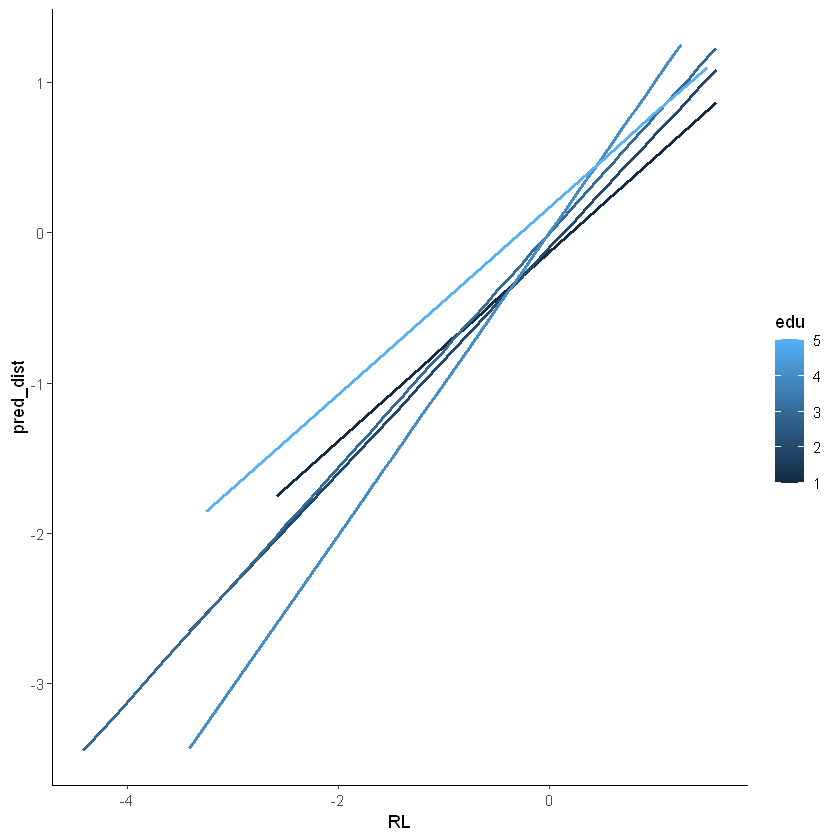

In [43]:
#可视化
library(dplyr)
library(ggplot2)
DATA %>% 
  mutate(pred_dist = fitted(model3)) %>% 
  ggplot(aes(x=RL, y=pred_dist, group=edu, color=edu)) + 
  theme_classic() +
  geom_line(size=1)